In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
from nltk import word_tokenize, sent_tokenize
from sentence_transformers import SentenceTransformer
from utils import Serialization

In [2]:
tqdm.pandas()
# model = SentenceTransformer("bert-large-nli-mean-tokens")

/u/jai/miniconda3/envs/venv37/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [119]:
def extract_vad(curr_df, col, masked):
    valence = []
    arousal = []
    dominance = []
    try:
        for i, row in curr_df.iterrows():
            v, a, d = eval(row[col + masked])
            valence.append(v)
            arousal.append(a)
            dominance.append(d)
    except Exception as e:
        print(e)
        print(row[col])
        print(e)
    curr_df['valence' + masked] = valence
    curr_df['arousal' + masked] = arousal
    curr_df['dominance' + masked] = dominance

    return curr_df



In [120]:
short_posts = pd.read_csv("short_posts_vad.csv", index_col=0)
short_posts =  extract_vad(short_posts, "output", "")
short_posts =  extract_vad(short_posts, "output", "_masked")
mid_posts = pd.read_csv("mid_posts_vad.csv", index_col=0)
mid_posts =  extract_vad(mid_posts, "output", "")
mid_posts =  extract_vad(mid_posts, "output", "_masked")
long_posts = pd.read_csv("long_posts_vad.csv", index_col=0)
long_posts =  extract_vad(long_posts, "output", "")
long_posts =  extract_vad(long_posts, "output", "_masked")

# mid_posts['output_mask'] = mid_posts['output_mask'].apply(eval)

In [121]:
pos_short = short_posts[short_posts['marker_category'].str.startswith("positive_affect")]
short_difs = np.abs(pos_short['valence'] - pos_short['valence_masked'])

pos_mid = mid_posts[mid_posts['marker_category'].str.startswith("positive_affect")]
mid_difs = np.abs(pos_mid['valence'] - pos_mid['valence_masked'] )

pos_long = long_posts[long_posts['marker_category'].str.startswith("positive_affect")]
long_difs = np.abs(pos_long['valence'] - pos_long['valence_masked'] )


In [122]:
short_difs.describe()

count    5125.000000
mean        0.115197
std         0.096674
min         0.000044
25%         0.034564
50%         0.089445
75%         0.176671
max         0.687007
dtype: float64

In [123]:
mid_difs.describe()

count    5328.000000
mean        0.046266
std         0.051458
min         0.000030
25%         0.011765
50%         0.027423
75%         0.062129
max         0.383805
dtype: float64

In [125]:
long_difs.describe()

count    2585.000000
mean        0.032532
std         0.037212
min         0.000003
25%         0.008211
50%         0.019328
75%         0.041263
max         0.352514
dtype: float64

In [134]:
print(pos_short['valence'].mean())
print(pos_short['valence_masked'].mean())

print(pos_mid['valence'].mean())
print(pos_mid['valence_masked'].mean())

print(pos_long['valence'].mean())
print(pos_long['valence_masked'].mean())

0.6509745526544
0.5559497695477558
0.5113340205932533
0.4891723962021868
0.48086535369296074
0.46861066474322616


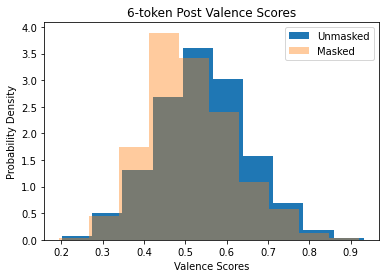

In [131]:
plt.hist(pos_short['valence'], density=True, label="Unmasked")
plt.hist(pos_short['valence_masked'], density=True, alpha=0.4, label="Masked")
plt.title("6-token Post Valence Scores")
plt.xlabel("Valence Scores")
plt.ylabel("Probability Density")
plt.legend()

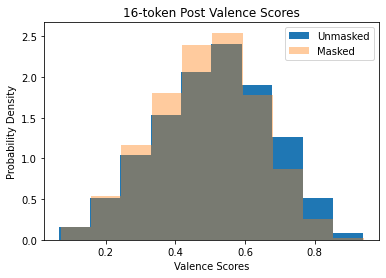

In [128]:
plt.hist(pos_mid['valence'], density=True, label="Unmasked")
plt.hist(pos_mid['valence_masked'], density=True, alpha=0.4, label="Masked")
plt.title("16-token Post Valence Scores")
plt.xlabel("Valence Scores")
plt.ylabel("Probability Density")
plt.legend()

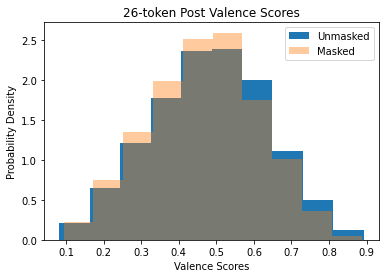

In [129]:
plt.hist(pos_long['valence'], density=True, label="Unmasked")
plt.hist(pos_long['valence_masked'], density=True, alpha=0.4, label="Masked")
plt.title("26-token Post Valence Scores")
plt.xlabel("Valence Scores")
plt.ylabel("Probability Density")
plt.legend()

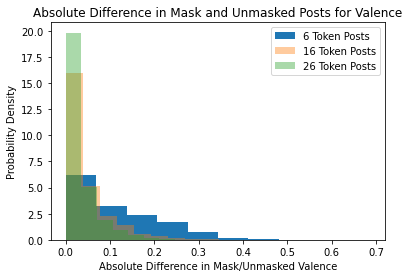

In [130]:
plt.hist(short_difs, density=True, label="6 Token Posts")
plt.hist(mid_difs, density=True, alpha=0.4, label="16 Token Posts")
plt.hist(long_difs, density=True, alpha=0.4, label="26 Token Posts")
plt.title("Absolute Difference in Mask and Unmasked Posts for Valence")
plt.xlabel("Absolute Difference in Mask/Unmasked Valence")
plt.ylabel("Probability Density")
plt.legend()

(array([6.10551274, 3.47418065, 2.94996996, 1.97349907, 1.16148643,
        0.39058836, 0.15417961, 0.01027864, 0.01027864, 0.01027864]),
 array([1.15232402e-04, 6.16906288e-02, 1.23266025e-01, 1.84841422e-01,
        2.46416818e-01, 3.07992214e-01, 3.69567611e-01, 4.31143007e-01,
        4.92718403e-01, 5.54293800e-01, 6.15869196e-01]),
 <BarContainer object of 10 artists>)

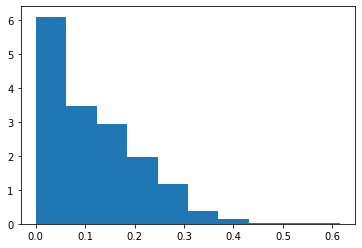

In [28]:
plt.hist(short_difs, density=True)

In [3]:
df1 = pd.read_csv("community_posting_statistics.csv", index_col=0)
df2 = pd.read_csv("community_posting_statistics_2_5_8_11.csv", index_col=0)

df = df1.add(df2, fill_value=0).sort_values(by="body")

In [29]:
df[df['body'] >= 5000].shape

(3020, 1)

In [5]:
cutoffs = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
com_counts = []
for cutoff in cutoffs:
    num_communities = df[df['body'] >= cutoff].shape[0]
    com_counts.append(num_communities)

Text(0.5, 1.0, 'Number of communities with at least n stance marker posts')

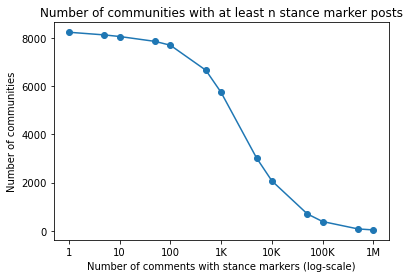

In [7]:
plt.plot(np.log10(cutoffs), com_counts, marker='o')
plt.xticks([0, 1, 2, 3, 4, 5, 6], labels = ["1", "10", "100", "1K", "10K", "100K", "1M"])
plt.xlabel("Number of comments with stance markers (log-scale)")
plt.ylabel("Number of communities")
plt.title("Number of communities with at least n stance marker posts")

Text(0.5, 1.0, 'Number of communities with at least n stance marker posts')

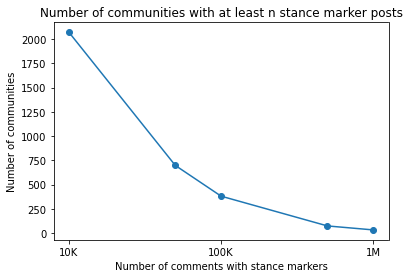

In [42]:
plt.plot(np.log10(cutoffs[-5:]), com_counts[-5:], marker='o')
plt.xticks([4, 5, 6], labels = ["10K", "100K", "1M"])
plt.xlabel("Number of comments with stance markers")
plt.ylabel("Number of communities")
plt.title("Number of communities with at least n stance marker posts")

In [80]:
ROOT_DIR = "/ais/hal9000/datasets/reddit/stance_analysis/"
files = list(os.walk(ROOT_DIR))
df = pd.read_json(files[1][0] + "/aa", lines=True)

stance_groups = pd.read_json("../stancemarkers/stancemarkers.json").T
sub_group = stance_groups[stance_groups['stance_group'].isin(["positive_affect_verbs", "positive_affect_adjective", "negative_affect_verbs", "negative_affect_adjective", "positive_affect_adverb", "negative_affect_adverb", "emphatic"])]
rel_markers = set(sub_group.index)
marker_to_group = sub_group['stance_group'].to_dict()

df = df[df['BF'] == 1]
df['sens'] = df['body'].progress_apply(lambda x: sent_tokenize(x))
df_big = df.explode("sens")
# df_big['len'] = df_big['body'].progress_apply(lambda x: len(word_tokenize(x)))


100%|██████████| 379141/379141 [00:44<00:00, 8533.52it/s]


In [91]:
def extract_relevant_markers(new_line, terms):
    curr_body = set(new_line.lower().split(" "))
    present_markers = [val for val in terms if val in curr_body]
    return present_markers

In [100]:
tmp = df_big[['author', 'subreddit', 'id', 'sens']].reset_index()
tmp['rel_marker'] = tmp['sens'].progress_apply(lambda x: extract_relevant_markers(x, rel_markers))
tmp['one_marker'] = tmp['rel_marker'].apply(lambda x: len(x) == 1)
tmp = tmp[tmp['one_marker']]
tmp['marker_category'] = tmp['rel_marker'].apply(lambda x: marker_to_group[x[0]])
tmp

,index,author,subreddit,id,sens,rel_marker,one_marker,marker_category
1,1,soitgoes93,AskMen,cggwbpy,"Just a guess, but, Germany?",[just],True,emphatic
5,3,UCSp1tF1r3,DotA2,cggwbq3,Either way I hope you can move on as painlessl...,[hope],True,positive_affect_verbs
12,7,gravity_rides,explainlikeimfive,cggwbq9,"Inevitably, you reach all speeds in between ze...",[just],True,emphatic
14,7,gravity_rides,explainlikeimfive,cggwbq9,Hopefully you see how the continuum applies to...,[hopefully],True,positive_affect_adverb
17,7,gravity_rides,explainlikeimfive,cggwbq9,"I am not knowledgeable on values and scales, b...",[just],True,emphatic
...,...,...,...,...,...,...,...,...
1206343,499991,adamwhenderson,Dallas,cghex0v,It's just that a line wraps around the buildin...,[just],True,emphatic
1206346,499992,akutabi,nfl,cghex0w,The Eagles are the one team that I never want ...,[want],True,positive_affect_verbs
1206348,499993,mr_glasses,worldnews,cghex0x,Most or possibly all beliefs can of course be ...,[most],True,emphatic
1206350,499993,mr_glasses,worldnews,cghex0x,It's just not the case.,[just],True,emphatic


In [101]:
tmp['len'] = tmp['sens'].progress_apply(lambda x: len(word_tokenize(x)))

100%|██████████| 308503/308503 [00:51<00:00, 6004.81it/s]


In [108]:
tmp = tmp.rename(columns={"sens": "body"})

In [109]:
# tmp = df_big[['author', 'body', 'subreddit', 'BF_markers', 'len']]
# tmp['marker_list'] = tmp['BF_markers'].apply(lambda x: x.split("__"))
# tmp['rel_marker'] = tmp['marker_list'].apply(lambda x: [marker for marker in x if marker in rel_markers])
# tmp['one_marker'] = tmp['rel_marker'].apply(lambda x: len(x) == 1)
# tmp = tmp[tmp['one_marker']]
# tmp['marker_category'] = tmp['rel_marker'].apply(lambda x: marker_to_group[x[0]])

In [140]:
tmp[tmp['len'] >= 26].shape

(69950, 9)

In [110]:
short_posts = tmp[tmp['len'] == 6]
mid_posts = tmp[tmp['len'] == 16]
long_posts = tmp[tmp['len'] == 26]

In [114]:
long_posts.shape

(6124, 9)

In [115]:
short_posts['body_mask'] = short_posts.apply(lambda x: re.sub(x['rel_marker'][0], "[MASK]", x['body'].lower()), axis=1)
mid_posts['body_mask'] = mid_posts.apply(lambda x: re.sub(x['rel_marker'][0], "[MASK]", x['body'].lower()), axis=1)
long_posts['body_mask'] = long_posts.apply(lambda x: re.sub(x['rel_marker'][0], "[MASK]", x['body'].lower()), axis=1)


/u/jai/miniconda3/envs/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/u/jai/miniconda3/envs/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/u/jai/miniconda3/envs/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [63]:
valence_model = Serialization.load_obj('valence_model')
arousal_model = Serialization.load_obj('arousal_model')
dominance_model = Serialization.load_obj('dominance_model')

In [65]:
def infer_emotion_value(post, regressor_v, regressor_a, regressor_d):
    try:
        embeddings = model.encode(post, show_progress_bar=False)
        v_predictions = regressor_v.predict(embeddings)
        a_predictions = regressor_a.predict(embeddings)
        d_predictions = regressor_d.predict(embeddings)
        assert(len(v_predictions) == len(embeddings))
        assert type(np.mean(v_predictions)) == np.float64
        return v_predictions, a_predictions, d_predictions
        # return [np.mean(v_predictions), np.mean(a_predictions), np.mean(d_predictions)]
    except Exception as e:
        print(e)
        return [np.nan, np.nan, np.nan]

In [116]:
short_posts.to_csv("short_posts.csv")
mid_posts.to_csv("mid_posts.csv")
long_posts.to_csv("long_posts.csv")

In [117]:
long_posts

,index,author,subreddit,id,body,rel_marker,one_marker,marker_category,len,body_mask
65,20,eegod,formula1,cggwbqs,Like [Bobby Jones] LINK In two different occas...,[like],True,positive_affect_verbs,26,[MASK] [bobby jones] link in two different occ...
573,214,colinshoemaker,Scotch,cggwbzr,there is also a vastly overlooked and really r...,[really],True,emphatic,26,there is also a vastly overlooked and [MASK] r...
705,288,Vernacules,leagueoflegends,cggwc3d,I've been on all ends of meta-breaking and alt...,[terrible],True,negative_affect_adjective,26,i've been on all ends of meta-breaking and alt...
792,334,potato1,changemyview,cggwc5m,A lot of it is only because most births in the...,[most],True,emphatic,26,a lot of it is only because [MASK] births in t...
894,368,rockjock29,fatpeoplestories,cggwc7b,"I wish you (and Manda, Mike Robbie and the bro...",[wish],True,positive_affect_verbs,26,"i [MASK] you (and manda, mike robbie and the b..."
...,...,...,...,...,...,...,...,...,...,...
1205197,499479,kurin,videos,cghewbe,"No shit they live in Jersey, the city is going...",[like],True,positive_affect_verbs,26,"no shit they live in jersey, the city is going..."
1205587,499634,ImpressiveDoggerel,television,cghewj7,"That is just an incredible, incomprehensible a...",[just],True,emphatic,26,"that is [MASK] an incredible, incomprehensible..."
1205836,499751,conor_lastowka,IAmA,cghewp2,"I think we knew about four minutes in, our onl...",[fear],True,negative_affect_verbs,26,"i think we knew about four minutes in, our onl..."
1205891,499776,btchmob,DotA2,cghewql,You know you don't need to ruin someone else's...,[just],True,emphatic,26,you know you don't need to ruin someone else's...


In [ ]:
short_posts[['valence', 'arousal', 'dominance']] = short_posts['body'].progress_apply(lambda x: infer_emotion_value(x, valence_model, arousal_model, dominance_model))

In [45]:
tmp.to_csv("temporary_valence_comparison.csv")

In [52]:
x = tmp[['body', 'subreddit']].groupby("subreddit").count()
x.add(x, fill_value=0)

,body
subreddit,
100pushups,4
1022,4
1200isplenty,10
1911,32
195,32
...,...
zelda,128
zen,172
zombies,40


In [51]:
 + tmp[['body', 'subreddit']].groupby("subreddit").count()

,body
subreddit,
100pushups,4
1022,4
1200isplenty,10
1911,32
195,32
...,...
zelda,128
zen,172
zombies,40


In [56]:
total = None
for dir_tup in files:
    dir = dir_tup[0]
    if not dir.endswith("files"):
        continue
    sub_files = sorted(dir_tup[2])
    for sub_file in tqdm(sub_files[:3]):
        print(dir + "/" + sub_file)
        df = pd.read_json(dir + "/" + sub_file, lines=True)
        tmp = df[df['BF'] == 1][['body', 'subreddit']]
        agg = tmp.groupby("subreddit").count()
        if total is None:
            total = agg
        else:
            total = total.add(agg, fill_value=0)
    break



  0%|          | 0/3 [00:00<?, ?it/s]

/ais/hal9000/datasets/reddit/stance_analysis/2014_04_files/aa


 33%|███▎      | 1/3 [00:10<00:21, 10.99s/it]

/ais/hal9000/datasets/reddit/stance_analysis/2014_04_files/ab


 67%|██████▋   | 2/3 [00:21<00:10, 10.79s/it]

/ais/hal9000/datasets/reddit/stance_analysis/2014_04_files/ac


100%|██████████| 3/3 [00:32<00:00, 10.84s/it]


In [59]:
total

,body
subreddit,
100pushups,2.0
1022,20.0
1200isplenty,27.0
1911,34.0
195,8.0
...,...
zelda,341.0
zen,461.0
zerocarb,3.0
